In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardio_train.csv', delimiter = ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.drop(['id'], axis = 1, inplace = True)

In [5]:
df_Shape = {"Rows": [len(df.index)], "Columns": [len(df.columns)]}
df_Shape = pd.DataFrame(df_Shape,index=["Value"])
df_Shape.transpose()

,Value
Rows,70000
Columns,12


In [6]:
for col in df.columns:
    ent = entropy(df[col].value_counts())
    if col == 'cholesterol':
        print(f'Column \"{col}\"\tΜissing values: {(df[col].isnull().sum() * 100 / len(df[col])):.2f}% || Entropy: {ent:.3f}')
    else:
        print(f'Column \"{col}\"\t\tΜissing values: {(df[col].isnull().sum() * 100 / len(df[col])):.2f}% || Entropy: {ent:.3f}')

Column "age"		Μissing values: 0.00% || Entropy: 8.756
Column "gender"		Μissing values: 0.00% || Entropy: 0.647
Column "height"		Μissing values: 0.00% || Entropy: 3.418
Column "weight"		Μissing values: 0.00% || Entropy: 3.980
Column "ap_hi"		Μissing values: 0.00% || Entropy: 2.015
Column "ap_lo"		Μissing values: 0.00% || Entropy: 1.585
Column "cholesterol"	Μissing values: 0.00% || Entropy: 0.738
Column "gluc"		Μissing values: 0.00% || Entropy: 0.527
Column "smoke"		Μissing values: 0.00% || Entropy: 0.298
Column "alco"		Μissing values: 0.00% || Entropy: 0.209
Column "active"		Μissing values: 0.00% || Entropy: 0.495
Column "cardio"		Μissing values: 0.00% || Entropy: 0.693


In [7]:
df.columns = ['age', 'gender', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 
              'cholesterol', 'glucose', 'smoking', 'alcohol_intake', 'physical_activity', 'target']

In [8]:
def to_category(x):
    if x == 1:
        x = 'normal'
    elif x == 2:
        x = 'high'
    elif x == 3:
        x = 'very_high'
        
    return x

df['age'] = df['age'].apply(lambda x: math.floor(x/365))
df['gender'] = df['gender'].apply(lambda x: 'female' if x == 1 else 'male')
df['cholesterol'] = df['cholesterol'].apply(lambda x: to_category(x))
df['glucose'] = df['glucose'].apply(lambda x: to_category(x))
df['smoking'] = df['smoking'].apply(lambda x: 'no' if x == 0 else 'yes')
df['alcohol_intake'] = df['alcohol_intake'].apply(lambda x: 'no' if x == 0 else 'yes')
df['physical_activity'] = df['physical_activity'].apply(lambda x: 'no' if x == 0 else 'yes')

In [9]:
df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol_intake,physical_activity,target
0,50,male,168,62.0,110,80,normal,normal,no,no,yes,0
1,55,female,156,85.0,140,90,very_high,normal,no,no,yes,1
2,51,female,165,64.0,130,70,very_high,normal,no,no,no,1
3,48,male,169,82.0,150,100,normal,normal,no,no,yes,1
4,47,female,156,56.0,100,60,normal,normal,no,no,no,0


In [10]:
df.describe().drop(labels = 'count', axis = 0).drop(labels = 'target', axis = 1)

,age,height,weight,systolic_bp,diastolic_bp
mean,52.840671,164.359229,74.205690,128.817286,96.630414
std,6.766774,8.210126,14.395757,154.011419,188.472530
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


<AxesSubplot:xlabel='variable', ylabel='value'>

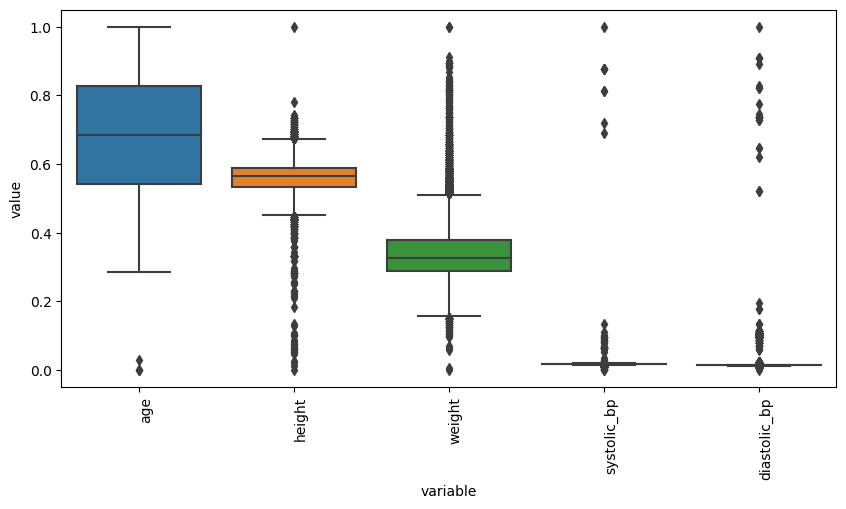

In [11]:
df_int = df.loc[:,['age','height', 'weight', 'systolic_bp', 'diastolic_bp']]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_int)
df_int_scaled = pd.DataFrame(scaled_values, index=df_int.index, columns=df_int.columns)
plt.figure(figsize = (10, 5), dpi = 100)
plt.xticks(rotation=90, ha='left')

sns.boxplot(x = 'variable', y = 'value',data = pd.melt(df_int_scaled))

In [12]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index, inplace = True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index, inplace = True)
df.drop(df[(df['systolic_bp'] > df['systolic_bp'].quantile(0.975)) | (df['systolic_bp'] < df['systolic_bp'].quantile(0.025))].index, inplace = True)
df.drop(df[(df['diastolic_bp'] > df['diastolic_bp'].quantile(0.975)) | (df['diastolic_bp'] < df['diastolic_bp'].quantile(0.025))].index, inplace = True)

In [13]:
df.describe().drop(labels = 'count', axis = 0).drop(labels = 'target', axis = 1)

,age,height,weight,systolic_bp,diastolic_bp
mean,52.839962,164.554854,73.426805,125.770526,81.046307
std,6.748089,6.830174,11.614806,13.761847,8.239157
min,29.000000,150.000000,52.000000,100.000000,60.000000
25%,48.000000,160.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,169.000000,80.000000,135.000000,90.000000
max,64.000000,180.000000,106.000000,163.000000,100.000000


<AxesSubplot:xlabel='variable', ylabel='value'>

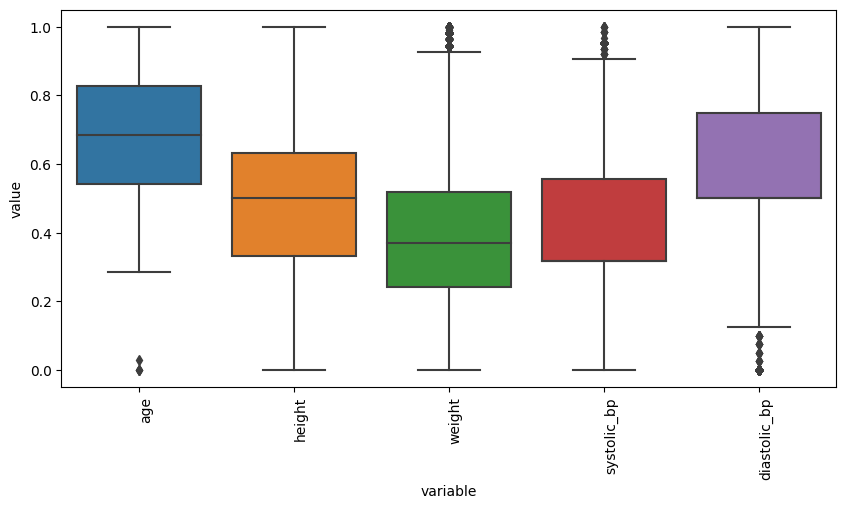

In [14]:
df_int = df.loc[:,['age','height', 'weight', 'systolic_bp', 'diastolic_bp']]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_int)
df_int_scaled = pd.DataFrame(scaled_values, index=df_int.index, columns=df_int.columns)
plt.figure(figsize = (10, 5), dpi = 100)
plt.xticks(rotation=90, ha='left')

sns.boxplot(x = 'variable', y = 'value',data = pd.melt(df_int_scaled))

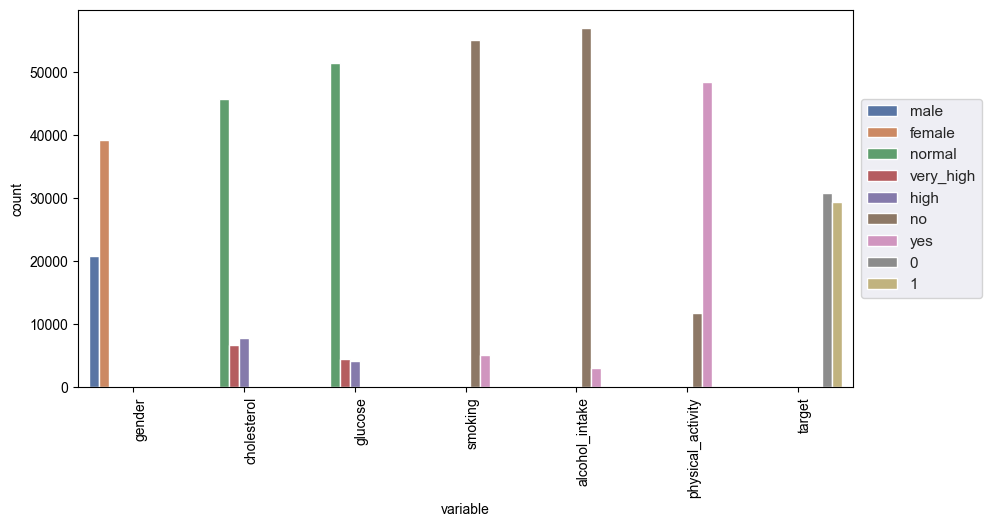

In [15]:
df_categorical = df.loc[:,['gender','cholesterol', 'glucose', 'smoking', 'alcohol_intake', 'physical_activity', 'target']]
plt.figure(figsize = (10, 5), dpi = 100)
plt.xticks(rotation=90, ha='left')

sns.set(style="darkgrid")
c_plot = sns.countplot(x="variable", hue="value", data= pd.melt(df_categorical))
c_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

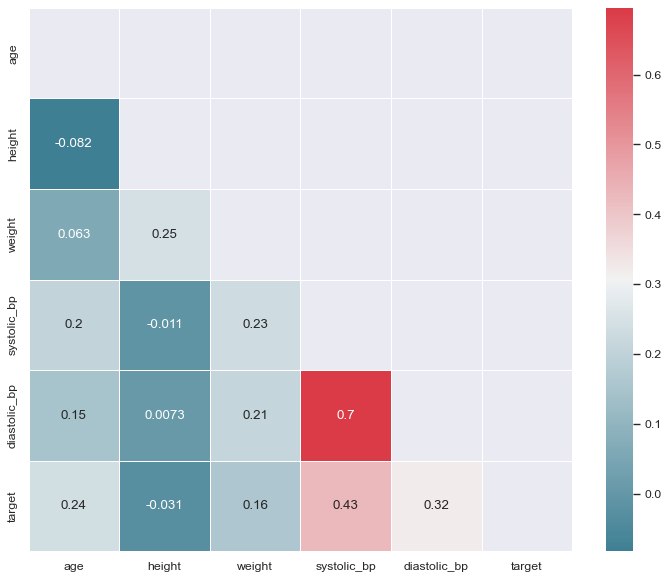

In [16]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (11, 9), dpi = 80)
sns.heatmap(corr, mask = mask, cmap = cmap, annot = True, square = True, linewidths = 0.5);

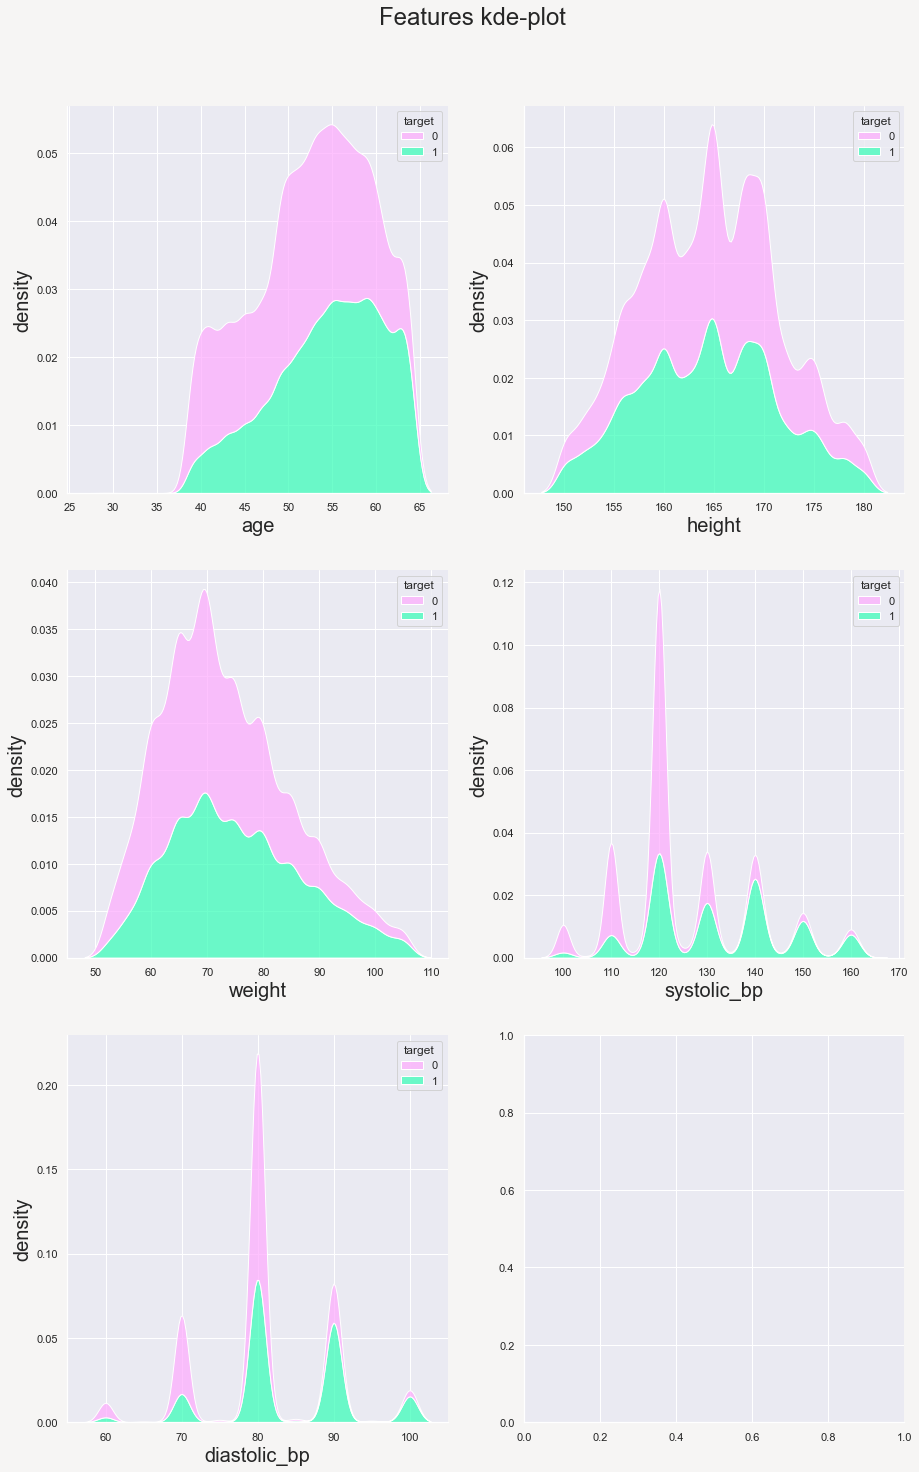

In [17]:
num_feats = ['age','height', 'weight', 'systolic_bp', 'diastolic_bp']
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(15, 23),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i)
    
    ax = sns.kdeplot(data=df, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    i = i +1
plt.suptitle('Features kde-plot' ,fontsize = 24);

In [18]:
cardio = pd.get_dummies(df).reset_index(drop = True)

In [19]:
cardio

,age,height,weight,systolic_bp,diastolic_bp,target,gender_female,gender_male,cholesterol_high,cholesterol_normal,cholesterol_very_high,glucose_high,glucose_normal,glucose_very_high,smoking_no,smoking_yes,alcohol_intake_no,alcohol_intake_yes,physical_activity_no,physical_activity_yes
0,50,168,62.0,110,80,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
1,55,156,85.0,140,90,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1
2,51,165,64.0,130,70,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0
3,48,169,82.0,150,100,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1
4,47,156,56.0,100,60,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60137,53,172,70.0,130,90,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1
60138,57,165,80.0,150,80,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1
60139,52,168,76.0,120,80,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1
60140,61,163,72.0,135,80,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0


In [20]:
cardio.to_csv("cardio_cleaned.csv", index = False)